In [6]:
# !pip install dash
# !pip install dash-bootstrap-components
# !pip install joblib
# !pip install mlflow
# !pip install xgboost
# !pip install seaborn


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
import mlflow
import mlflow.sklearn
import itertools

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold

# from xgboost import XGBRegressor

In [10]:
loaded_cars=pd.read_csv("Cars.csv", index_col=None)

In [11]:
loaded_cars.shape

(8128, 13)

In [12]:
loaded_cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
def carOwnerNumber(numStr):
  labels={"First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4, "Test Drive Car":5}
  return labels[numStr]

loaded_cars['owner']=loaded_cars['owner'].apply(carOwnerNumber)
loaded_cars.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [14]:

print(loaded_cars.shape)
loaded_cars = loaded_cars.drop(loaded_cars[(loaded_cars['fuel'] == 'CNG') | (loaded_cars['fuel'] == 'LPG')].index)
print(loaded_cars.shape)
loaded_cars.head()


(8128, 13)
(8033, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [15]:
loaded_cars['mileage']=loaded_cars['mileage'].str.replace(' kmpl','').astype(float)
loaded_cars['engine']=loaded_cars['engine'].str.replace(' CC','').astype(float)
loaded_cars['max_power']=loaded_cars['max_power'].str.replace(' bhp','').astype(float)
loaded_cars['name']=loaded_cars['name'].str.split(" ").str[0]
loaded_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
null_count=loaded_cars.isnull().sum()
null_count

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
torque           214
seats            214
dtype: int64

In [17]:
loaded_cars['mileage'] = loaded_cars['mileage'].fillna(loaded_cars['mileage'].median())
loaded_cars['engine'] = loaded_cars['engine'].fillna(loaded_cars['engine'].median())
loaded_cars['max_power'] = loaded_cars['max_power'].fillna(loaded_cars['max_power'].median())
loaded_cars['seats'] = loaded_cars['seats'].fillna(loaded_cars['seats'].median())


In [18]:
medians = {
    "year": loaded_cars['year'].median(),
    "mileage": loaded_cars['mileage'].median(),
    "max_power": loaded_cars['max_power'].median()
}
joblib.dump(medians, "medians.pkl")

['medians.pkl']

In [19]:
loaded_cars.drop(['torque'],axis=1,inplace=True)
loaded_cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [20]:
null_count=loaded_cars.isnull().sum()
null_count

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [21]:
unique_cars=loaded_cars['name'].unique()
print(len(unique_cars)," unique car names")
unique_cars

32  unique car names


array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [22]:
print(loaded_cars.shape)
loaded_cars.drop(loaded_cars[loaded_cars['owner']==5].index, inplace=True)
print(loaded_cars.shape)
loaded_cars.head()

(8033, 12)
(8028, 12)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [23]:
import seaborn as sns


In [24]:
loaded_cars.describe()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats
count,8028.000000,8.028000e+03,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000
mean,2013.815521,6.403937e+05,6.977314e+04,1.458022,19.389510,1457.185725,91.575667,5.410314
std,4.030836,8.027015e+05,5.664419e+04,0.715283,3.948293,499.187790,35.369251,0.952623
min,1983.000000,2.999900e+04,1.000000e+03,1.000000,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,1.000000,16.800000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,1.000000,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,2.000000,22.100000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,4.000000,42.000000,3604.000000,400.000000,14.000000


In [25]:
sns.set_style(style="whitegrid")
plt.figure(figsize=(12,10))

<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

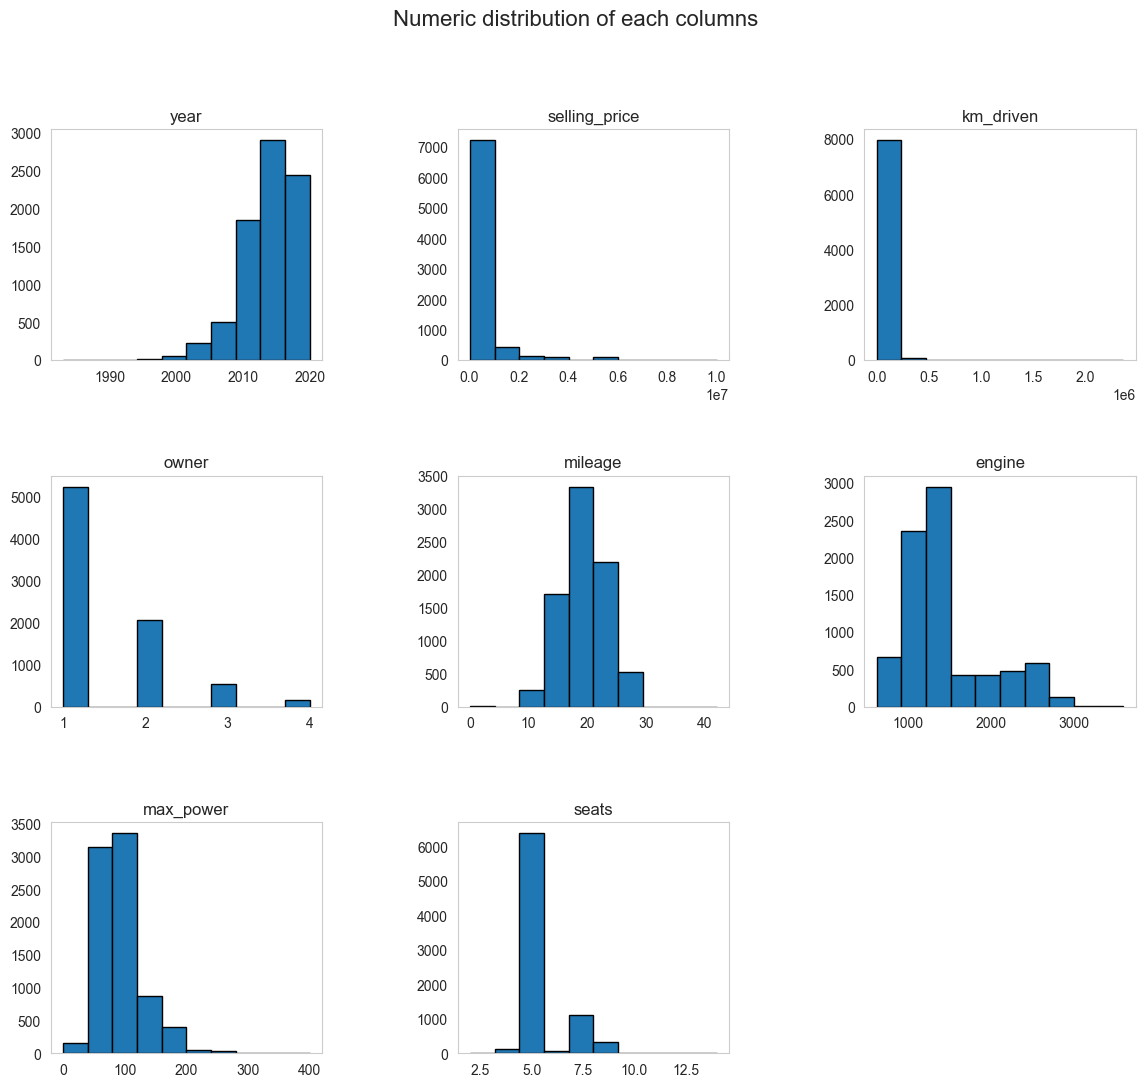

In [26]:
ax = loaded_cars.hist(figsize=(14, 12), edgecolor='black', grid=False)
plt.suptitle("Numeric distribution of each columns",fontsize=16)
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [27]:
numeric_columns=loaded_cars.select_dtypes(include=['int','float']).columns
numeric_columns

Index(['year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine',
       'max_power', 'seats'],
      dtype='object')

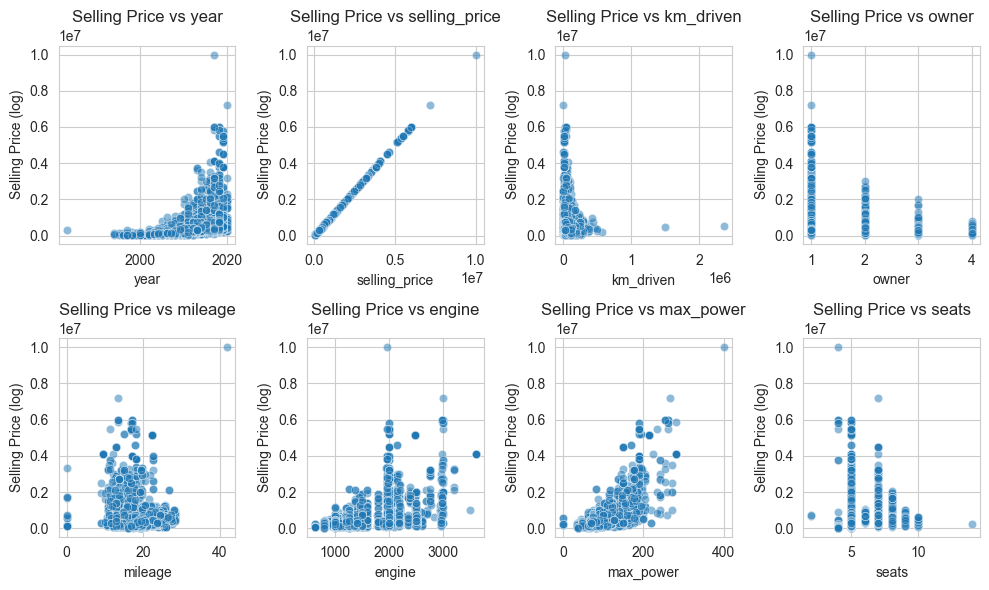

In [28]:
plt.figure(figsize=(10, 6))

for i, col in enumerate(numeric_columns, 1):

    plt.subplot(2, 4, i)
    sns.scatterplot(x=loaded_cars[col], y=loaded_cars["selling_price"], alpha=0.5)
    plt.title(f"Selling Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Selling Price (log)")

plt.tight_layout()
plt.show()

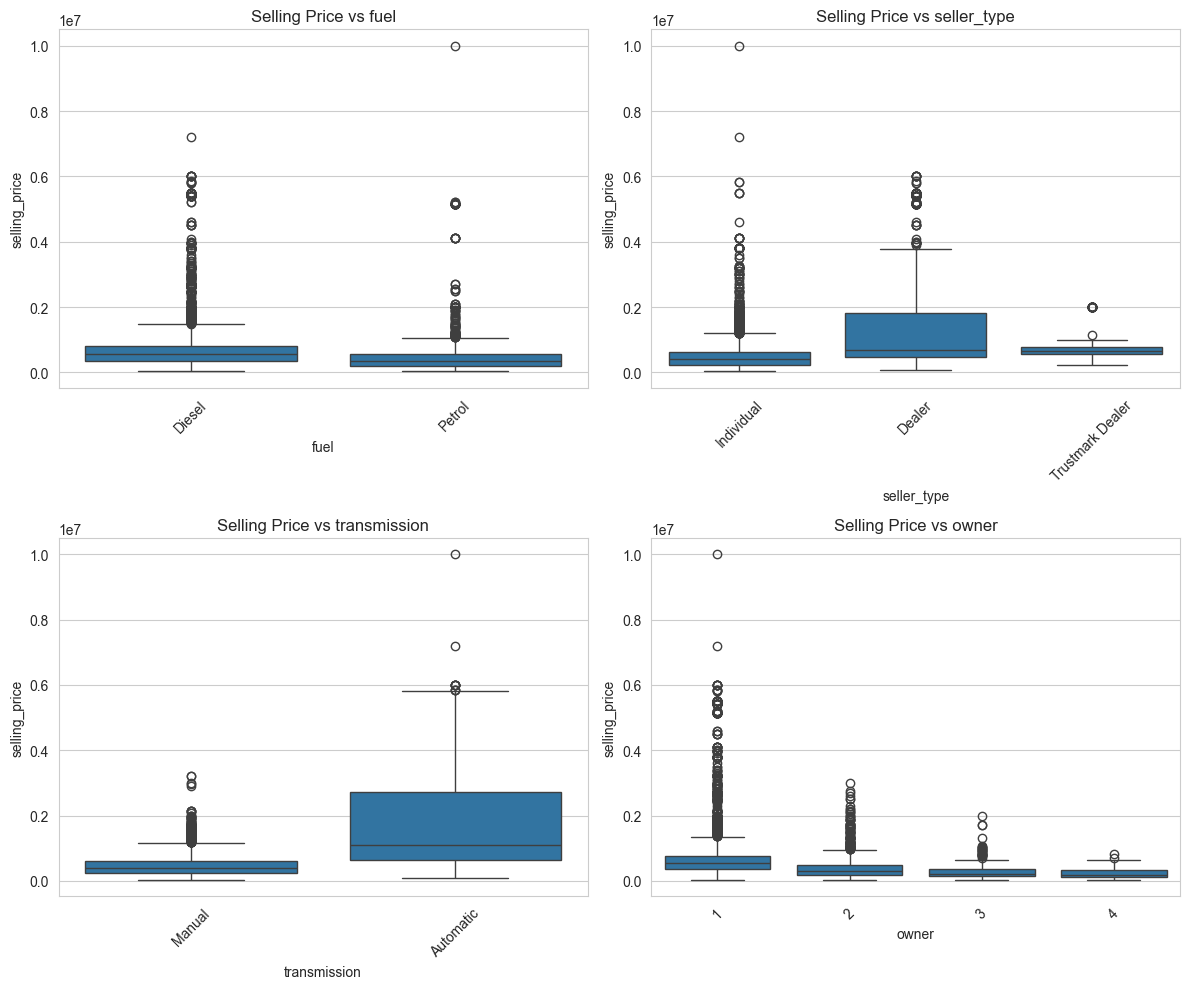

In [29]:
cat_features = ["fuel", "seller_type", "transmission", "owner"]

plt.figure(figsize=(12, 10))

for i, col in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=loaded_cars[col], y=loaded_cars["selling_price"])
    plt.title(f"Selling Price vs {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: >

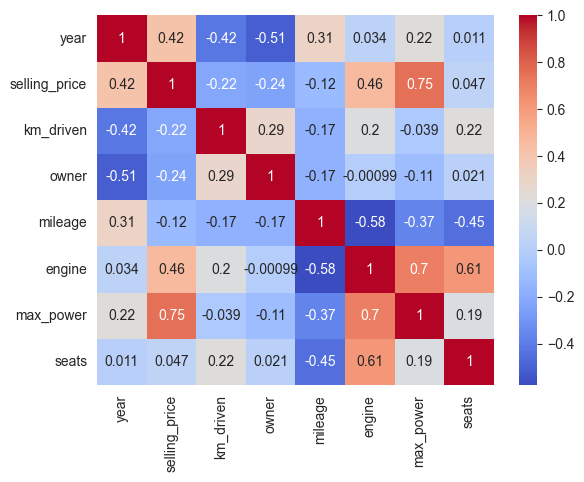

In [30]:
# loaded_cars[numeric_columns].corr()
sns.heatmap(loaded_cars[numeric_columns].corr(), annot=True, cmap="coolwarm")

In [31]:
# loaded_cars = pd.get_dummies(loaded_cars, columns=['fuel', 'transmission', 'seller_type'], drop_first=True)

In [37]:

X = loaded_cars[['max_power','mileage','year']]

labels=[0,1,2,3]
max_selling_price=loaded_cars['selling_price'].max()
minimum_selling_price=loaded_cars['selling_price'].min()

#creating bins using np.linspace
bins=np.linspace(minimum_selling_price,max_selling_price+1,5) 

y=pd.cut(loaded_cars['selling_price'],bins=bins,labels=labels)


# Normalize features
y.isna().sum()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test  = scaler.transform(X_test)
# # X_train = X_train.values
# y_train = y_train.values

# joblib.dump(scaler,'scaler_a3.pkl')


np.int64(1)

In [ ]:
# Add intercept to X
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

In [ ]:
# k=len(labels)
k=len(set(y))
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))

for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [ ]:
# plt.figure(figsize=(6,6))
# plt.scatter(X[:, 0], X[:, 1], label='class 0', c=y)
# plt.show()

In [ ]:
# importances = grid_search.best_estimator_.feature_importances_
# feat_names = X.columns
# sns.barplot(x=importances, y=feat_names)
# plt.title("Feature Importances")
# plt.show()

In [ ]:
class MultinomialLogisticRegression:
    def __init__(self, n_features, n_classes, lr=0.01, max_iter=2000, method='batch', batch_frac=0.3, l2_lambda=0.0, verbose=False):
        """
        n_features: number of columns in X (including intercept)
        n_classes: number of target classes (k)
        method: 'batch', 'minibatch', 'stochastic'
        l2_lambda: regularization strength (lambda). 0.0 means no regularization.
        """
        self.n = n_features
        self.k = n_classes
        self.lr = lr
        self.max_iter = max_iter
        self.method = method
        self.batch_frac = batch_frac
        self.l2 = l2_lambda
        self.verbose = verbose
        # initialize weights small random
        self.W = np.random.randn(self.n, self.k) * 0.01
        self.loss_history = []

    @staticmethod
    def softmax(z):
        # z shape: (m, k)
        z_stable = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_stable)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def predict_proba(self, X):
        return self.softmax(X @ self.W)

    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

    def _compute_loss_and_grad(self, Xb, Yb):
        """
        Cross-entropy loss with optional L2 regularization.
        Xb: (m, n)
        Yb: (m, k) one-hot
        """
        m = Xb.shape[0]
        scores = Xb @ self.W             # (m, k)
        probs = self.softmax(scores)     # (m, k)
        # numeric stability
        eps = 1e-12
        # cross-entropy
        ce_loss = - np.sum(Yb * np.log(probs + eps)) / m
        # L2 penalty excludes intercept (row 0)
        W_no_intercept = self.W.copy()
        W_no_intercept[0, :] = 0.0
        l2_loss = 0.5 * (self.l2 / m) * np.sum(W_no_intercept**2)
        loss = ce_loss + l2_loss

        # gradient
        error = probs - Yb              # (m, k)
        grad = (Xb.T @ error) / m       # (n, k)
        if self.l2 != 0.0:
            grad += (self.l2 / m) * W_no_intercept
        return loss, grad

    def fit(self, X, Y_onehot):
        m = X.shape[0]
        if self.method == 'batch':
            for i in range(self.max_iter):
                loss, grad = self._compute_loss_and_grad(X, Y_onehot)
                self.W -= self.lr * grad
                self.loss_history.append(loss)
                if self.verbose and i % 200 == 0:
                    print(f"[batch] iter {i} loss={loss:.6f}")
        elif self.method == 'minibatch':
            batch_size = max(1, int(self.batch_frac * m))
            for i in range(self.max_iter):
                # sample batch (without guarantee of covering all points)
                idx = np.random.choice(m, batch_size, replace=False)
                Xb = X[idx]
                Yb = Y_onehot[idx]
                loss, grad = self._compute_loss_and_grad(Xb, Yb)
                self.W -= self.lr * grad
                self.loss_history.append(loss)
                if self.verbose and i % 500 == 0:
                    print(f"[minibatch] iter {i} loss={loss:.6f}")
        elif self.method == 'stochastic':
            for i in range(self.max_iter):
                idx = np.random.randint(0, m)
                Xb = X[idx:idx+1]
                Yb = Y_onehot[idx:idx+1]
                loss, grad = self._compute_loss_and_grad(Xb, Yb)
                self.W -= self.lr * grad
                self.loss_history.append(loss)
                if self.verbose and i % 1000 == 0:
                    print(f"[stochastic] iter {i} loss={loss:.6f}")
        else:
            raise ValueError("method must be 'batch', 'minibatch', or 'stochastic'")

    def plot_losses(self):
        plt.plot(self.loss_history)
        plt.title("Training loss")
        plt.xlabel("iteration")
        plt.ylabel("loss")
        plt.show()

# -------------------------
# Metrics from scratch
# -------------------------
def accuracy_score_custom(y_true, y_pred):
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    return np.mean(y_true == y_pred)

def precision_recall_f1_per_class(y_true, y_pred, k):
    """
    returns dicts: precision[class], recall[class], f1[class], support[class]
    """
    y_true = np.asarray(y_true).flatten()
    y_pred = np.asarray(y_pred).flatten()
    precision = {}
    recall = {}
    f1 = {}
    support = {}
    for c in range(k):
        tp = np.sum((y_pred == c) & (y_true == c))
        fp = np.sum((y_pred == c) & (y_true != c))
        fn = np.sum((y_pred != c) & (y_true == c))
        # tn not needed for these metrics
        prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
        rec = tp / (tp + fn) if (tp + fn) > 0 else 0.0
        f1_score = (2 * prec * rec / (prec + rec)) if (prec + rec) > 0 else 0.0
        precision[c] = prec
        recall[c] = rec
        f1[c] = f1_score
        support[c] = np.sum(y_true == c)
    return precision, recall, f1, support

def macro_weighted_from_per_class(precision, recall, f1, support):
    classes = sorted(precision.keys())
    supports = np.array([support[c] for c in classes], dtype=float)
    total = supports.sum() if supports.sum() > 0 else 1.0
    # macro: unweighted mean
    macro_precision = np.mean([precision[c] for c in classes])
    macro_recall    = np.mean([recall[c] for c in classes])
    macro_f1        = np.mean([f1[c] for c in classes])
    # weighted
    weights = supports / total
    weighted_precision = np.sum([weights[i] * precision[c] for i, c in enumerate(classes)])
    weighted_recall    = np.sum([weights[i] * recall[c]    for i, c in enumerate(classes)])
    weighted_f1        = np.sum([weights[i] * f1[c]        for i, c in enumerate(classes)])
    return {
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1,
        'weighted_precision': weighted_precision,
        'weighted_recall': weighted_recall,
        'weighted_f1': weighted_f1
    }



[minibatch] iter 0 loss=1.608076
[minibatch] iter 500 loss=0.094408
[minibatch] iter 1000 loss=0.068135
[minibatch] iter 1500 loss=0.060684
[minibatch] iter 2000 loss=0.052421
[minibatch] iter 2500 loss=0.058019


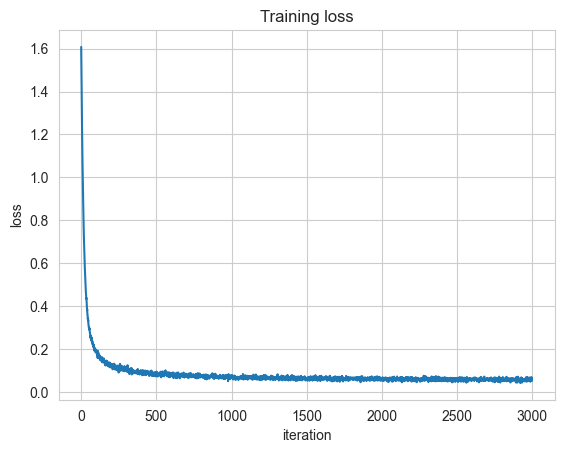

=== Custom metrics (Test) ===
Accuracy: 0.9651
Class 0: precision=0.9833, recall=0.9967, f1=0.9900, support=1536
Class 1: precision=0.3243, recall=0.2857, f1=0.3038, support=42
Class 2: precision=0.5833, recall=0.2593, f1=0.3590, support=27
Class 3: precision=0.0000, recall=0.0000, f1=0.0000, support=1
Class 4: precision=0.0000, recall=0.0000, f1=0.0000, support=0
Macro precision/recall/f1: 0.37819177559061956 0.3083436673280423 0.3305498391159357
Weighted precision/recall/f1: 0.9587311930232986 0.9651307596513077 0.9608076207948689

=== sklearn classification_report (Test) ===
              precision    recall  f1-score   support

           0     0.9833    0.9967    0.9900      1536
           1     0.3243    0.2857    0.3038        42
           2     0.5833    0.2593    0.3590        27
           3     0.0000    0.0000    0.0000         1

    accuracy                         0.9651      1606
   macro avg     0.4727    0.3854    0.4132      1606
weighted avg     0.9587    0.9651  

c:\Users\gaurav\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gaurav\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\gaurav\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
model = MultinomialLogisticRegression(n_features=n, n_classes=k, lr=0.1, max_iter=3000, method='minibatch', batch_frac=0.25, l2_lambda=1.0, verbose=True)
model.fit(X_train, Y_train_encoded)

# predictions
yhat_train = model.predict(X_train)
yhat_test  = model.predict(X_test)

# training plot
model.plot_losses()

# our metrics (test)
acc = accuracy_score_custom(y_test, yhat_test)
precision_dict, recall_dict, f1_dict, support_dict = precision_recall_f1_per_class(y_test, yhat_test, k)
agg = macro_weighted_from_per_class(precision_dict, recall_dict, f1_dict, support_dict)

print("=== Custom metrics (Test) ===")
print(f"Accuracy: {acc:.4f}")
for c in range(k):
    print(f"Class {c}: precision={precision_dict[c]:.4f}, recall={recall_dict[c]:.4f}, f1={f1_dict[c]:.4f}, support={support_dict[c]}")
print("Macro precision/recall/f1:", agg['macro_precision'], agg['macro_recall'], agg['macro_f1'])
print("Weighted precision/recall/f1:", agg['weighted_precision'], agg['weighted_recall'], agg['weighted_f1'])

# sklearn classification report for comparison
print("\n=== sklearn classification_report (Test) ===")
print(classification_report(y_test, yhat_test, digits=4))

# confusion matrix (optional)
cm = confusion_matrix(y_test, yhat_test)
print("Confusion matrix:\n", cm)